# Pymaceuticals Inc.
---

### Analysis
  According to our data, we can make the following observations:
                - Observation #1: Upon analysis, we notice the following correlation :  as the weight of the mice increase, the tumor volume also increases. 
                -Observation #2: Capomulin treatment of Mouse I509 ,shows  there is a decrease in tumor volume as the days increase. Showing the possible positive effect of        this drug.
                -Observation #3: We tested an equal amount of female and male mice (total of 249).To see if there was any correlation between sex and results, but there is no major difference between both sexes and treatment success. 

      
 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\Diana\Desktop\Matplotlib-Challenge5\Data\Mouse_metadata.csv"
study_results_path = r"C:\Users\Diana\Desktop\Matplotlib-Challenge5\Data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data= pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [110]:
# Checking the number of mice.
number_of_mice= total_data["Mouse ID"].nunique()
number_of_mice
print("Total mice:",number_of_mice)

#female mice
number_of_female_mice = total_data[total_data["Sex"] == "Female"]["Mouse ID"].nunique()
print("Number of female mice:", number_of_female_mice)
#male mice 
number_of_male_mice =total_data[total_data["Sex"] == "Male"]["Mouse ID"].nunique()
print("Number of male mice:", number_of_female_mice)



Total mice: 249
Number of female mice: 124
Number of male mice: 124


In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
duplicate_mice_id



array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = total_data.loc[total_data["Mouse ID"] == duplicate_mice_id[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data=clean_total_data["Mouse ID"].unique()


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_regimen_data.groupby("Drug Regimen")
drug_regimen_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_regimen_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_regimen_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_regimen_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_regimen_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_regimen_mean,
                                 "Median Tumor Volume":  drug_regimen_median,
                                 "Tumor Volume Variance":  drug_regimen_var,
                                 "Tumor Volume Std. Dev.":  drug_regimen_std,
                                 "Tumor Volume Std. Err.":  drug_regimen_sem})
drug_reg_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
aggr_summary_df = drug_regimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
aggr_summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

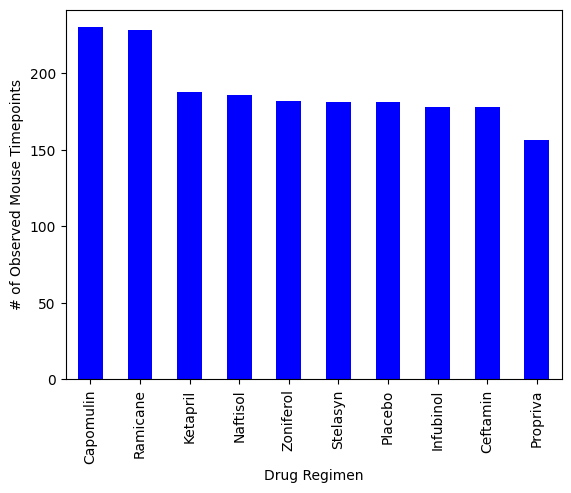

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_and_drugs = clean_total_data[["Drug Regimen","Timepoint"]]
mice_tested = mice_and_drugs["Drug Regimen"].value_counts()
mice_tested
mice_tested.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="# of Observed Mouse Timepoints")

plt.show()

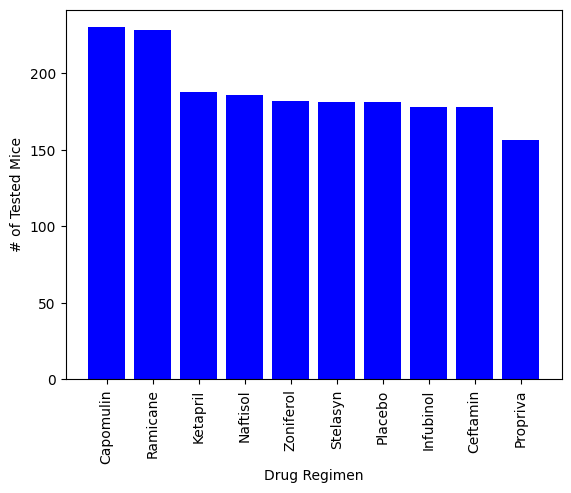

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_tested.index.values
count = mice_tested.values
plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Tested Mice')
plt.xticks(rotation=90)
plt.show()

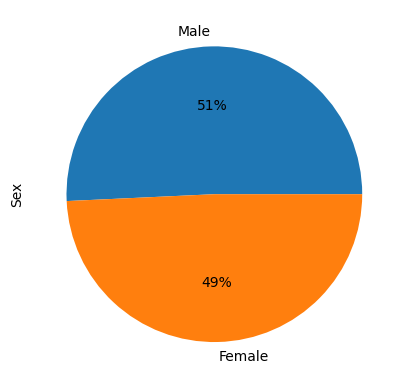

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = clean_total_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_vs_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

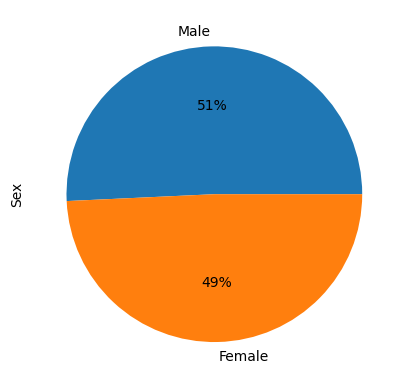

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_vs_female.index.values
count_value = male_vs_female.values
plt.ylabel("Sex")
plt.pie(x=count_value, labels= sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tested_mice_id= clean_total_data.groupby("Mouse ID")
last_g_timepoint = tested_mice_id["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorvol_last_tp= pd.merge(last_g_timepoint,clean_total_data, on=["Mouse ID","Timepoint"],how="left")


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumorvol_data_list = [
    {"Capomulin": [],
     "Ramicane": [],
     "Infubinol": [],
     "Ceftamin": []}
]

capomulin_data = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Capomulin"]
tumorvol_data_list[0]["Capomulin"] = capomulin_data["Tumor Volume (mm3)"].tolist()

ramicane_data = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Ramicane"]
tumorvol_data_list[0]["Ramicane"] = ramicane_data["Tumor Volume (mm3)"].tolist()

infubinol_data = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Infubinol"]
tumorvol_data_list[0]["Infubinol"] = infubinol_data["Tumor Volume (mm3)"].tolist()

ceftamin_data = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Ceftamin"]
tumorvol_data_list[0]["Ceftamin"] = ceftamin_data["Tumor Volume (mm3)"].tolist()
 
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
capomulin_tumor_vol = capomulin_data["Tumor Volume (mm3)"]
ramicane_tumor_vol = ramicane_data["Tumor Volume (mm3)"]
infubinol_tumor_vol = infubinol_data ["Tumor Volume (mm3)"]
ceftamin_tumor_vol = ceftamin_data["Tumor Volume (mm3)"]

  #add subset
capomulin_tumor_vol = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
ramicane_tumor_vol = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
infubinol_tumor_vol = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
ceftamin_tumor_vol = tumorvol_last_tp.loc[tumorvol_last_tp["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]


    
    # Determine outliers using upper and lower bounds

cap_outliers = [] 
ram_outliers = [] 
inf_outliers = []
cef_outliers = []



In [93]:
def calculate_outliers(tumor_vol):
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q, upper_q = quartiles[0.25], quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound, upper_bound = lower_q - (1.5 * iqr), upper_q + (1.5 * iqr)
    
    outliers_low = (tumor_vol < lower_bound)
    outliers_high = (tumor_vol > upper_bound)
    outliers = tumor_vol[(outliers_low | outliers_high)].tolist()
    
    return outliers

# For each treatment, calculate and print potential outliers
treatments = {
    'Capomulin': capomulin_tumor_vol,
    'Ramicane': ramicane_tumor_vol,
    'Infubinol': infubinol_tumor_vol,
    'Ceftamin': ceftamin_tumor_vol
}

for treatment, tumor_vol in treatments.items():
    outliers = calculate_outliers(tumor_vol)
    print(f' {treatment} potential outliers: Series({outliers})')



 Capomulin potential outliers: Series([])
 Ramicane potential outliers: Series([])
 Infubinol potential outliers: Series([36.3213458])
 Ceftamin potential outliers: Series([])


Text(0.5, 0, '')

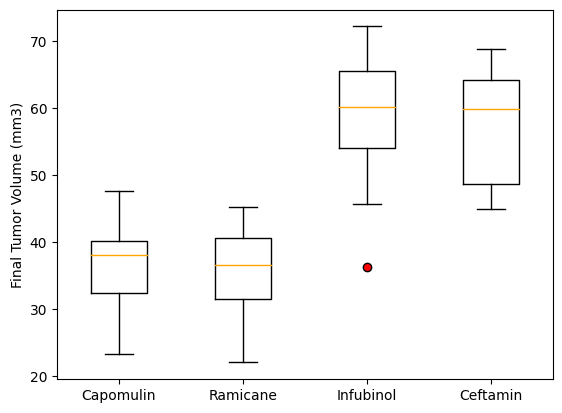

In [98]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid=False, color=dict(boxes='k', whiskers='k', medians='orange'), flierprops=dict(markerfacecolor='red'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')


## Line and Scatter Plots

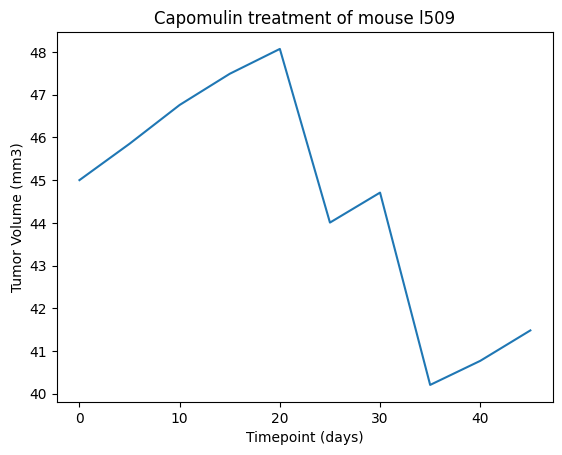

In [103]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
r_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
r_capomulin_df = r_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = r_capomulin_df.index.values
tumor_vol = r_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


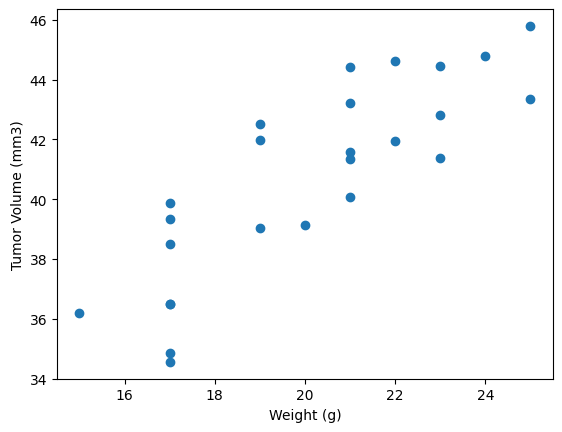

In [104]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumorvol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumorvol})
#graph build and display
plt.scatter(weight, avg_tumorvol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


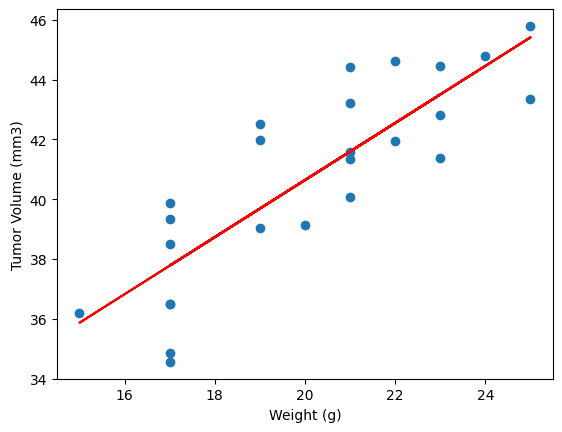

In [105]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumorvol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumorvol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
